# 一、导库

In [81]:
import requests
import json #json解析
import pandas as pd 
import numpy as np
import lxml #暂时用不到，如果json爬不到的话，就使用xpath解析
from lxml import etree
import pyecharts

# 二、使用json解析爬取数据

In [ ]:
# original_url = https://api.bilibili.com/x/v2/reply/main?jsonp=jsonp&next=2&type=1&oid=418762389&mode=3&plat=1&_=1625373420277
#设置请求头和Cookie
headers = {
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36'
    ,'referer': 'https://www.bilibili.com/video/BV1CV411s7jd'
    ,'cookie': "_uuid=3D94FAC6-EE42-D62D-0CCA-5CB7335DD30C28919infoc; buvid3=7BD5E36C-4D35-49E5-B287-D79354AF0EEC143092infoc; CURRENT_FNVAL=80; rpdid=|(k|k)~|m)lk0J'ulmm)mmR~l; LIVE_BUVID=AUTO2715999942207166; dy_spec_agreed=1; buivd_fp=7BD5E36C-4D35-49E5-B287-D79354AF0EEC143092infoc; buvid_fp=7BD5E36C-4D35-49E5-B287-D79354AF0EEC143092infoc; SESSDATA=c83dcf19%2C1635952392%2Cc2b78%2A51; bili_jct=b6469494b02fc66f0357c6b1bfad2341; DedeUserID=34646708; DedeUserID__ckMd5=f794614b866c1c02; sid=hwjl2y7h; blackside_state=0; fingerprint3=f48895fc948e2c02de6ce51c00a4fdf8; fingerprint=5ca8cc979061419fefe20dfb47a58597; buvid_fp_plain=7BD5E36C-4D35-49E5-B287-D79354AF0EEC143092infoc; PVID=2; fingerprint_s=63ef2ac976651439d133ae173cf2896f; bp_video_offset_34646708=543240919732131617; CURRENT_QUALITY=64; bfe_id=393becc67cde8e85697ff111d724b3c8"

}

In [ ]:
#定义多个列表
comment_list = []
name_list = []
like_list = []
level_list = []
sex_list = []

In [2]:
#写响应网址循环
for page in range(1,100):
    url = 'https://api.bilibili.com/x/v2/reply/main?jsonp=jsonp&next={}&type=1&oid=418762389&mode=3&plat=1&_=1625373420277'.format(page)
#     print(url)
    
    response = requests.get(url=url,headers = headers).text
    response = response.replace("jQuery172023600936978632525_1625374210928(","") #要先用replace把这些删掉才能爬到
    response = response.replace(")","")
    
    #用json.loads加载response数据
    re_data = json.loads(response)
    
    #由于有一些是空评论，因此对数据进行判断，如果不等于空值则返回
    if re_data['data']['replies']!=None :
        for i in re_data["data"]['replies']:
            comment = i["content"]['message']
            name = i["member"]['uname'] 
            like = i["like"] 
            level = i['member']['level_info']['current_level']
            sex = i["member"]['sex'] 
            
            #将爬取到的数据输入列表中
            comment_list.append(comment)
            sex_list.append(sex)
            like_list.append(like)
            level_list.append(level)
            name_list.append(name)
        

In [ ]:
#使用Dataframe给列进行重命名
data = pd.DataFrame({"名字":name_list,"性别":sex_list,"等级":level_list,"评论内容":comment_list,"点赞":like_list})
data.head()

In [3]:
#只有使用encoding="'utf_8_sig"这种解码方式，才不会乱码
data.to_csv("D:/哔哩哔哩评论爬虫_无乱码.csv",header=1,encoding="'utf_8_sig")

# 三、数据预处理

In [82]:
data_ = pd.read_csv("D:/哔哩哔哩评论爬虫_无乱码.csv",index_col=0) #读取数据
data_.info()#查看数据
data_.describe()#统计分析
data_.dropna() #删除有空值的行
# data_.drop_duplicates() #删除重复值

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1972 entries, 0 to 1971
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   名字      1972 non-null   object
 1   性别      1972 non-null   object
 2   等级      1972 non-null   int64 
 3   评论内容    1972 non-null   object
 4   点赞      1972 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 92.4+ KB


,名字,性别,等级,评论内容,点赞
0,Alan_极蓝星辰,男,6,我被小陈点名了？！快乐啊！[咩栗_好耶],16707
1,Alan_极蓝星辰,男,6,我被小陈点名了？！快乐啊！[咩栗_好耶],16707
2,落九川,女,6,哔哩哔哩，🍻干杯！小破站 冲啊！！！！！给爷冲！！！！🍻\n[热词系列_这次一定][热词系列...,8164
3,清梦星河酱,女,5,小破站12周年生日快乐！[12周年][12周年][12周年][12周年],4508
4,宸星冬暮,男,5,小陈来汇报工作啦！ bilibili12周年快乐！bilibili干杯🍻！,3922
...,...,...,...,...,...
1967,在新世界的边缘试探,女,5,好快啊～,0
1968,邢欲该盗小妖怪,男,5,祝小破站生日快乐，也祝我自己生日快乐,0
1969,PPBentley,保密,6,我对最喜欢的动画主题曲！,0
1970,汶君Wo,保密,4,感谢小破站带给我的快乐[打call],0


In [83]:
# data_.drop(1,axis=0,inplace=True)
#恢复索引
data_.index = range(data_.shape[0])

In [84]:
data_.head()

,名字,性别,等级,评论内容,点赞
0,Alan_极蓝星辰,男,6,我被小陈点名了？！快乐啊！[咩栗_好耶],16707
1,Alan_极蓝星辰,男,6,我被小陈点名了？！快乐啊！[咩栗_好耶],16707
2,落九川,女,6,哔哩哔哩，🍻干杯！小破站 冲啊！！！！！给爷冲！！！！🍻\n[热词系列_这次一定][热词系列...,8164
3,清梦星河酱,女,5,小破站12周年生日快乐！[12周年][12周年][12周年][12周年],4508
4,宸星冬暮,男,5,小陈来汇报工作啦！ bilibili12周年快乐！bilibili干杯🍻！,3922


In [85]:
#发现有重复行，使用drop删除第一行
data_.drop(1,axis = 0,inplace=True)
#删除后索引被打乱，需要使用range和shape进行恢复
data_.index = range(data_.shape[0])
data_.head()

,名字,性别,等级,评论内容,点赞
0,Alan_极蓝星辰,男,6,我被小陈点名了？！快乐啊！[咩栗_好耶],16707
1,落九川,女,6,哔哩哔哩，🍻干杯！小破站 冲啊！！！！！给爷冲！！！！🍻\n[热词系列_这次一定][热词系列...,8164
2,清梦星河酱,女,5,小破站12周年生日快乐！[12周年][12周年][12周年][12周年],4508
3,宸星冬暮,男,5,小陈来汇报工作啦！ bilibili12周年快乐！bilibili干杯🍻！,3922
4,二货㊣,女,6,bilibili生日快乐，bilibili陪我又过一年，我陪bilibili又过一年[给心心...,2627


# 四、数据可视化

### 使pyechart中的bar对点赞top50进行柱状图可视化呈现，滚动加载
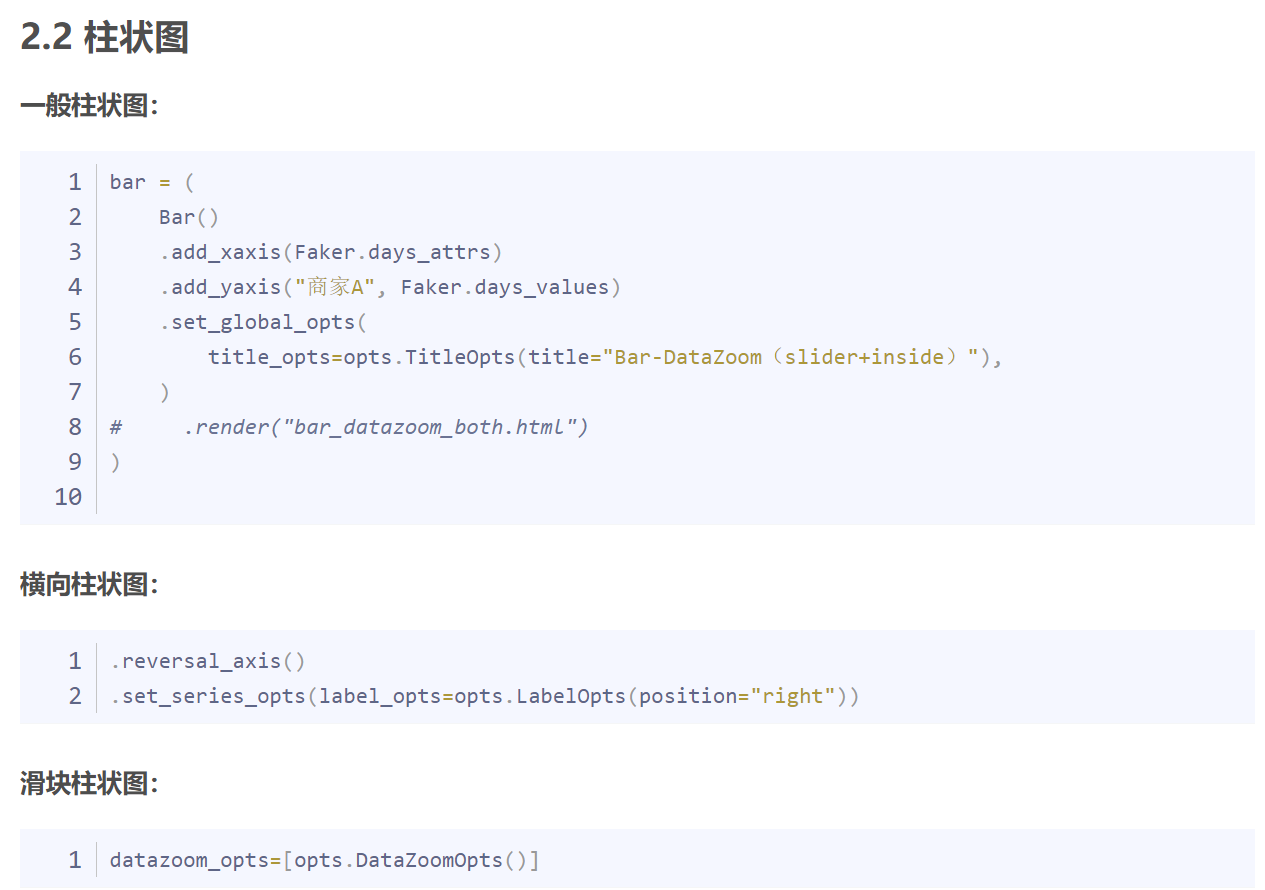

In [86]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.faker import Faker

In [87]:
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_NOTEBOOK
# map.render_notebook()

In [88]:
df1 = data_.sort_values(by = "点赞",ascending=False).head(50) #根据点赞降序排列
df1.head()

,名字,性别,等级,评论内容,点赞
0,Alan_极蓝星辰,男,6,我被小陈点名了？！快乐啊！[咩栗_好耶],16707
1,落九川,女,6,哔哩哔哩，🍻干杯！小破站 冲啊！！！！！给爷冲！！！！🍻\n[热词系列_这次一定][热词系列...,8164
5,吃素的狮子,男,6,12岁快乐！,4661
2,清梦星河酱,女,5,小破站12周年生日快乐！[12周年][12周年][12周年][12周年],4508
3,宸星冬暮,男,5,小陈来汇报工作啦！ bilibili12周年快乐！bilibili干杯🍻！,3922


In [106]:
#用pyechart呈现出可以拖动的条形图，灵活呈现该视频的点赞情况
bar = (
    Bar()
    .add_xaxis(df1["评论内容"].to_list())
    .add_yaxis("点赞数", df1["点赞"].to_list(), color=Faker.rand_color())
    .set_global_opts(
        title_opts=opts.TitleOpts(title="评论热度Top50"),
        datazoom_opts=[opts.DataZoomOpts(), opts.DataZoomOpts(type_="inside")],
    )
    .render_notebook()
)
bar

### 使用饼图呈现用户等级分布

In [91]:
# 导入相关的库
from pyecharts import options as opts
from pyecharts.charts import Pie
from pyecharts.faker import Faker

In [25]:
# 使用以用户等级为索引，使用value_counts查看每一等级下的用户数，降序
data_.等级.value_counts().sort_index(ascending=False)

6    201
5    841
4    634
3    244
2     51
Name: 等级, dtype: int64

In [154]:
pie = (
    Pie()
    .add(
        "",
        [list(z) for z in zip([str(i) for i in range(2,7)], [63,138,312,502,165])],
        radius=["40%", "75%"],
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="等级分布"),
        legend_opts=opts.LegendOpts(orient="vertical", pos_top="15%", pos_left="2%"),
    )
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
    .render_notebook()
)
pie

- 可以看出，在B站12周年演讲视频中，4-5级用户数量最多，说明B站的粉丝粘性还是比较高的，老粉多（我也是一个5级号）

In [155]:
#对用户性别分布进行饼图呈现
data_.性别.value_counts().sort_index(ascending=False)

pie_gender = (
    Pie()
    .add(
        "",
        [list(z) for z in zip(["男","女","保密"], ["404",'103','673'])],
        radius=["40%", "75%"],
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="性别分布"),
        legend_opts=opts.LegendOpts(orient="vertical", pos_top="15%", pos_left="2%"),
    )
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
    .render_notebook()
    
)
pie_gender


- 超过一半以上的用户都选择了隐藏自己的性别，说明目前互联网用户还是非常关注自己的隐私的

# 使用wordcloud对总体数据绘制词云图


In [29]:
from wordcloud import WordCloud
import jieba #结巴分词，设置停用词的时候需要用到
from tkinter import _flatten
from matplotlib.pyplot import imread
from PIL import Image, ImageDraw, ImageFont #设置图片蒙版的时候用到
import matplotlib.pyplot as plt #plt展示图像，设置图例和参数
# import pyecharts
# from pyecharts.charts import WordCloud

Building prefix dict from the default dictionary ...
Loading model from cache D:\temps\jieba.cache
Loading model cost 0.642 seconds.
Prefix dict has been built successfully.


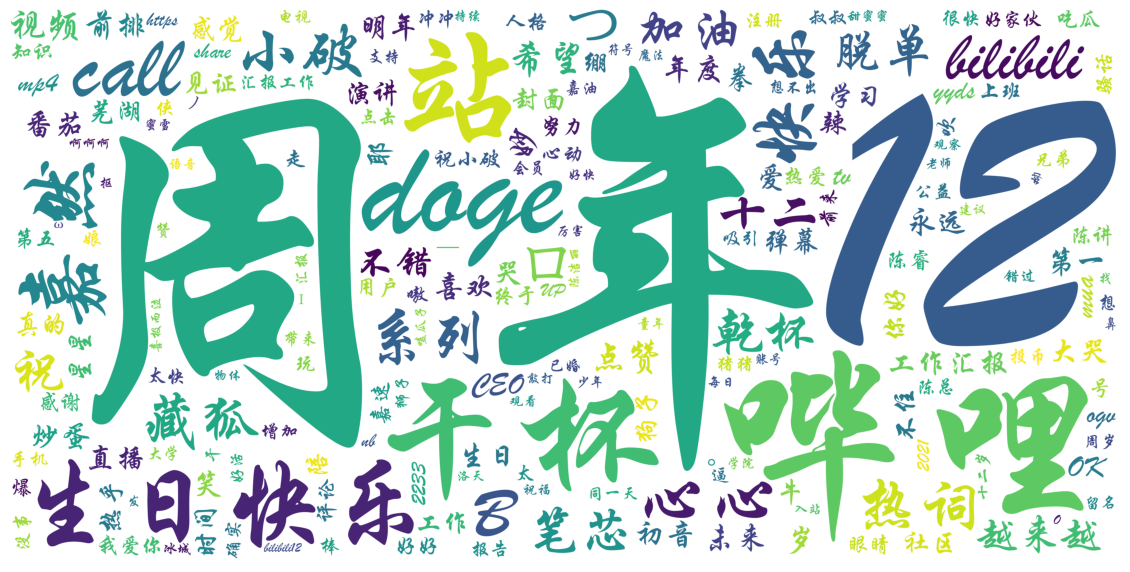

In [30]:

with open('D:/系统默认/桌面/停用词.txt','r',encoding='utf-8') as f:
    stopword = f.read()
# total = stopWord.split() + stopWords.split()
def my_word_cloud(data_=None, stopword=None, img=None):
    dataCut = data_.apply(jieba.lcut)  # 分词
    dataAfter = dataCut.apply(lambda x: [i for i in x if i not in stopword])  # 去除停用词
    wordFre = pd.Series(_flatten(list(dataAfter))).value_counts()  # 统计词频
#     mask = plt.imread(img)
    plt.figure(figsize=(20,20))
    wc  = WordCloud(scale=10,font_path='C:/Windows/Fonts/STXINGKA.TTF',background_color="white")
    wc.fit_words(wordFre)
    plt.imshow(wc)
    plt.axis('off')
my_word_cloud(data_=data_["评论内容"],stopword=stopword,img="1.jpeg")


### 通过mask蒙版的方式，对词云进行优化

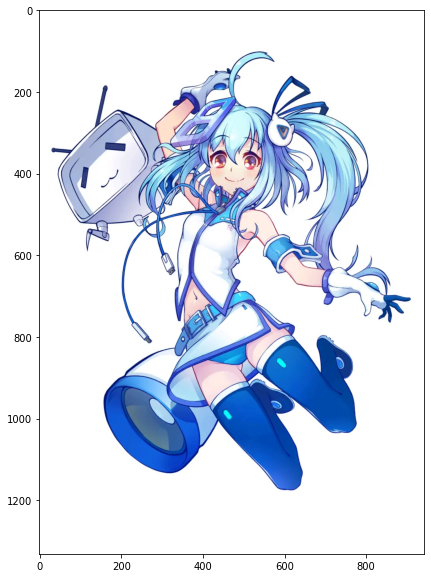

In [40]:
b_image = plt.imread(r"D:/系统默认/桌面/b.jpg") #导入图片
plt.figure(figsize=(10,10)) #设置画布大小
plt.imshow(b_image) #展示图片


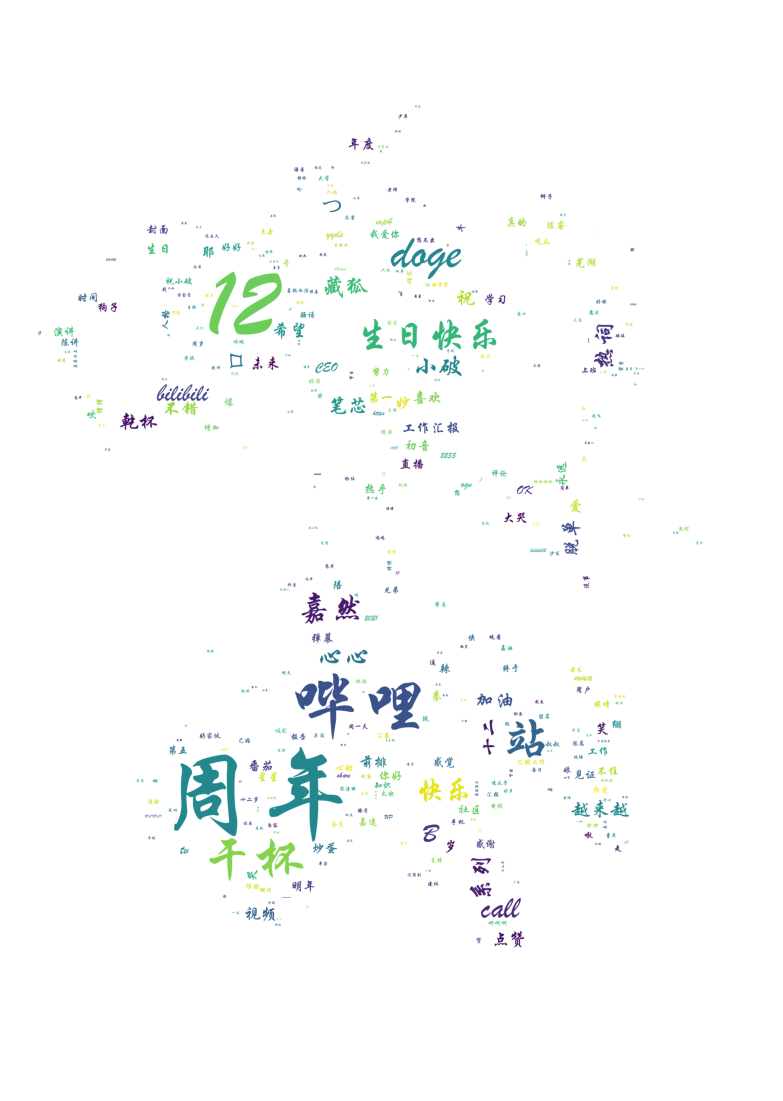

In [46]:
#把画图过程包装到函数内
def my_word_cloud(data_=None, stopword=None, img=None):
    dataCut = data_.apply(jieba.lcut)  # 分词
    dataAfter = dataCut.apply(lambda x: [i for i in x if i not in stopword])  # 去除停用词
    wordFre = pd.Series(_flatten(list(dataAfter))).value_counts()  # 统计词频
    mask = b_image
    plt.figure(figsize=(20,20))
    wc  = WordCloud(scale=10,font_path='C:/Windows/Fonts/STXINGKA.TTF'
                    ,background_color="white"
                    ,mask=mask
                    ,max_font_size=300#设置蒙版,调整字体大小和字数限制
                    ,max_words=400
                   )
    wc.fit_words(wordFre)
    plt.imshow(wc)
    plt.axis('off')
    
#调用函数
my_word_cloud(data_=data_["评论内容"],stopword=stopword,img="B站12周年.jpeg")

# 文本分析

In [31]:
data2 = data_.copy() #不对源数据造成破坏

In [110]:
data2.info()#查看数据
data2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   名字      1971 non-null   object
 1   性别      1971 non-null   object
 2   等级      1971 non-null   int64 
 3   评论内容    1971 non-null   object
 4   点赞      1971 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 77.1+ KB


,名字,性别,等级,评论内容,点赞
0,Alan_极蓝星辰,男,6,我被小陈点名了？！快乐啊！[咩栗_好耶],16707
1,落九川,女,6,哔哩哔哩，🍻干杯！小破站 冲啊！！！！！给爷冲！！！！🍻\n[热词系列_这次一定][热词系列...,8164
2,清梦星河酱,女,5,小破站12周年生日快乐！[12周年][12周年][12周年][12周年],4508
3,宸星冬暮,男,5,小陈来汇报工作啦！ bilibili12周年快乐！bilibili干杯🍻！,3922
4,二货㊣,女,6,bilibili生日快乐，bilibili陪我又过一年，我陪bilibili又过一年[给心心...,2627


In [111]:
data2.describe().T #统计

,count,mean,std,min,25%,50%,75%,max
等级,1971.0,4.455099,0.924779,2.0,4.0,5.0,5.0,6.0
点赞,1971.0,39.076611,483.261247,0.0,1.0,1.0,2.0,16707.0


In [112]:
comment = data2['评论内容']
comment

0                                    我被小陈点名了？！快乐啊！[咩栗_好耶]
1       哔哩哔哩，🍻干杯！小破站 冲啊！！！！！给爷冲！！！！🍻\n[热词系列_这次一定][热词系列...
2                    小破站12周年生日快乐！[12周年][12周年][12周年][12周年]
3                   小陈来汇报工作啦！ bilibili12周年快乐！bilibili干杯🍻！
4       bilibili生日快乐，bilibili陪我又过一年，我陪bilibili又过一年[给心心...
                              ...                        
1966                                                 好快啊～
1967                                   祝小破站生日快乐，也祝我自己生日快乐
1968                                         我对最喜欢的动画主题曲！
1969                                   感谢小破站带给我的快乐[打call]
1970                                                   来了
Name: 评论内容, Length: 1971, dtype: object

## 使用snownlp对评论进行正负面情感分析
- what
    - 文本情感分析（也称为意见挖掘）是指用自然语言处理、文本挖掘以及计算机语言学等方法来**识别和提取原素材中的主观信息**
- how
    - 导包 from snownlp import SnowNLP
    - 低于0.3分，负面；高于0.8，正面；在0.3和0.8之间，则为中性

In [113]:
from snownlp import SnowNLP
from snownlp import sentiment

In [114]:
#使用默认的词典对模型进行训练
# D:\Software\python\Lib\site-packages\snownlp\sentiment\pos.txt
# D:\Software\python\Lib\site-packages\snownlp\sentiment\neg.txt
sentiment.train(r'D:\系统默认\桌面\pos.txt',r'D:\系统默认\桌面\neg.txt')

In [117]:
sentiment.save('sentiment.bilibili_comment')

In [118]:
pinglun = data2.loc[:,'评论内容']

In [119]:
pinglun

0                                    我被小陈点名了？！快乐啊！[咩栗_好耶]
1       哔哩哔哩，🍻干杯！小破站 冲啊！！！！！给爷冲！！！！🍻\n[热词系列_这次一定][热词系列...
2                    小破站12周年生日快乐！[12周年][12周年][12周年][12周年]
3                   小陈来汇报工作啦！ bilibili12周年快乐！bilibili干杯🍻！
4       bilibili生日快乐，bilibili陪我又过一年，我陪bilibili又过一年[给心心...
                              ...                        
1966                                                 好快啊～
1967                                   祝小破站生日快乐，也祝我自己生日快乐
1968                                         我对最喜欢的动画主题曲！
1969                                   感谢小破站带给我的快乐[打call]
1970                                                   来了
Name: 评论内容, Length: 1971, dtype: object

In [124]:
senti=[SnowNLP(i).sentiments for i in pinglun]

In [125]:
#定义列表
newsenti=[]
for i in senti:
  if (i>=0.8):
      newsenti.append("正向")
  elif(0.4<=i<0.8):
      newsenti.append('负向')
  else:
      newsenti.append('莫的感情')

In [ ]:
#查看索引是否相同

In [126]:
data2.index

RangeIndex(start=0, stop=1971, step=1)

In [127]:
pd.DataFrame(newsenti).index

RangeIndex(start=0, stop=1971, step=1)

In [128]:
#恢复索引
data2.index = range(data2.shape[0])

In [129]:
#新建评分内容列
data2['predict'] = newsenti

In [132]:
data2.head()

,名字,性别,等级,评论内容,点赞,predict
0,Alan_极蓝星辰,男,6,我被小陈点名了？！快乐啊！[咩栗_好耶],16707,莫的感情
1,落九川,女,6,哔哩哔哩，🍻干杯！小破站 冲啊！！！！！给爷冲！！！！🍻\n[热词系列_这次一定][热词系列...,8164,负向
2,清梦星河酱,女,5,小破站12周年生日快乐！[12周年][12周年][12周年][12周年],4508,莫的感情
3,宸星冬暮,男,5,小陈来汇报工作啦！ bilibili12周年快乐！bilibili干杯🍻！,3922,莫的感情
4,二货㊣,女,6,bilibili生日快乐，bilibili陪我又过一年，我陪bilibili又过一年[给心心...,2627,莫的感情


In [133]:
data2.predict.value_counts().sort_index()

正向        94
莫的感情    1337
负向       540
Name: predict, dtype: int64

### snownlp小结
- 大多数评论分布在0.4到0.8这个区间

In [134]:
data2['predict'] == "正向"

0       False
1        True
2       False
3       False
4       False
        ...  
1966    False
1967    False
1968    False
1969    False
1970     True
Name: predict, Length: 1971, dtype: bool

In [139]:
#取出评论为负向的列
data2[data2['predict'] == "正向"]

,名字,性别,等级,评论内容,点赞,predict
10,猫不理咖啡,男,6,[捂眼]我出息了 虽然只有0.5秒,1411,正向
44,茶颜悦色,保密,6,小破站冲鸭！！[打call][打call],95,正向
47,美丽中国支教项目,保密,6,生日快乐！[热词系列_吹爆][热词系列_吹爆][热词系列_吹爆],76,正向
61,___桐人,男,4,主要是用户满意度[2233娘_大笑],88,正向
67,黯竹Official,男,6,建议0级到1级，入站考试100题。3级到4级，安排一定数量的执勤小黑屋任务。,146,正向
...,...,...,...,...,...,...
1862,张三的二奶,男,5,这不比抖音快手好？,0,正向
1869,-墨晴轩-,男,5,宣传片一共2分多，你就放了两秒动画，今天B站引流的神时光代理人，还有一秒徐伦的二创，你好意思...,0,正向
1894,骚林功夫加唱歌跳舞,保密,6,想不出什么骚话，就祝大家一夜暴富吧,0,正向
1929,彷徨花落,保密,5,不敢说话,0,正向


In [146]:
#查看某条被标注为负面评论的分数
text2 ='这不比抖音快手好？'
SnowNLP(text2).sentiments

0.921107237620105

In [153]:
#加载保存在本地的snownlp模型
data_path = r'C:\Users\梁卓君\sentiment.bilibili_comment'
class Sentiment(object):
    pass